In [21]:
import numpy as np
import matplotlib.pyplot as plt

class DatasetLoader:
    @staticmethod
    def load_pca_data(file_path):
        """
        Load PCA data from a file, display basic statistics, and visualize a portion of the data.
        """
        data = np.loadtxt(file_path)
        print(f"\nPCA Data Loaded: {data.shape}")  # Show the shape of the data

        # Check for NaN or Infinite values
        if np.isnan(data).any():
            print("Warning: PCA data contains NaN values.")
        if np.isinf(data).any():
            print("Warning: PCA data contains infinite values.")

        # Display basic statistics
        print(f"\nData Statistics (PCA):")
        print(f"Min: {np.min(data)}, Max: {np.max(data)}, Mean: {np.mean(data)}, Std: {np.std(data)}")

        # Print a few samples of the data
        print("\nFirst 5 Rows of PCA Data:")
        print(data[:5])  # Print the first 5 rows

        # Visualize a small portion of the data
        # plt.figure(figsize=(10, 5))
        # for i in range(10):  # Loop through the first 10 rows
        #     plt.plot(range(data.shape[1]), data[i], label=f"Row {i+1}")
        # plt.title("Visualization of First 10 Rows (PCA Data)")
        # plt.xlabel("Columns")
        # plt.ylabel("Values")
        # plt.legend(loc='upper right', fontsize='small')
        # plt.show()

        return data

    @staticmethod
    def load_em_data(file_path):
        """
        Load EM data from a file, display basic statistics, and visualize a portion of the data.
        """
        data = np.loadtxt(file_path)
        print(f"\nEM Data Loaded: {data.shape}")  # Show the shape of the data

        # Check for NaN or Infinite values
        if np.isnan(data).any():
            print("Warning: EM data contains NaN values.")
        if np.isinf(data).any():
            print("Warning: EM data contains infinite values.")

        # Display basic statistics
        print(f"\nData Statistics (EM):")
        print(f"Min: {np.min(data)}, Max: {np.max(data)}, Mean: {np.mean(data)}, Std: {np.std(data)}")

        # Print a few samples of the data
        print("\nFirst 5 Rows of EM Data:")
        print(data[:5])  # Print the first 5 rows

        # Visualize a small portion of the data
        plt.figure(figsize=(10, 5))
        for i in range(10):  # Loop through the first 10 rows
            plt.plot(range(data.shape[1]), data[i], label=f"Row {i+1}")
        plt.title("Visualization of First 10 Rows (EM Data)")
        plt.xlabel("Columns")
        plt.ylabel("Values")
        plt.legend(loc='upper right', fontsize='small')
        plt.show()

        return data


In [22]:

class PCA:
    def __init__(self, data):
        """
        Initialize the PCA object with data.
        """
        self.data = data
        self.mean = None
        self.std = None
        self.eigenvalues = None
        self.eigenvectors = None
        self.standardized_data = None

    def standardize_data(self):
        """
        Standardize the data by subtracting the mean and dividing by the standard deviation.
        """
        self.mean = np.mean(self.data, axis=0)
        self.std = np.std(self.data, axis=0)
        self.standardized_data = (self.data - self.mean) / self.std
        print(f"Data standardized. Mean: {self.mean}, Std: {self.std}")

    def compute_covariance_matrix(self):
        """
        Compute the covariance matrix of the standardized data.
        """
        if self.standardized_data is None:
            raise ValueError("Data must be standardized before computing the covariance matrix.")
        covariance_matrix = np.cov(self.standardized_data, rowvar=False)
        print(f"Covariance matrix computed. Shape: {covariance_matrix.shape}")
        return covariance_matrix

    def perform_eigen_decomposition(self, covariance_matrix):
        """
        Perform eigen decomposition on the covariance matrix.
        """
        self.eigenvalues, self.eigenvectors = np.linalg.eigh(covariance_matrix)
        print(f"Eigen decomposition completed. Eigenvalues shape: {self.eigenvalues.shape}, "
              f"Eigenvectors shape: {self.eigenvectors.shape}")

    def sort_eigen_pairs(self):
        """
        Sort eigenvalues and eigenvectors in descending order.
        """
        sorted_indices = np.argsort(self.eigenvalues)[::-1]
        self.eigenvalues = self.eigenvalues[sorted_indices]
        self.eigenvectors = self.eigenvectors[:, sorted_indices]
        print("Eigenvalues and eigenvectors sorted.")

    def compute_pca(self):
        """
        Execute the full PCA computation pipeline.
        """
        print("Starting PCA computation...")
        self.standardize_data()
        covariance_matrix = self.compute_covariance_matrix()
        self.perform_eigen_decomposition(covariance_matrix)
        self.sort_eigen_pairs()
        print("PCA computation completed.")

    def project_data(self, n_components=2):
        """
        Project data onto the top n_components eigenvectors.
        """
        if self.eigenvectors is None:
            raise ValueError("Eigenvectors are not computed. Call compute_pca() first.")
        top_eigenvectors = self.eigenvectors[:, :n_components]
        projected_data = np.dot(self.standardized_data, top_eigenvectors)
        print(f"Data projected onto {n_components} components. Projected data shape: {projected_data.shape}")
        return projected_data

    @staticmethod
    def scatter_plot(projected_data, labels=None, title="PCA Projection"):
        """
        Visualize the projected data with an enhanced scatter plot.

        Args:
        - projected_data (numpy array): The 2D data to plot.
        - labels (array-like, optional): Labels for coloring points. Default is None.
        - title (str): Title for the plot. Default is "PCA Projection".
        """
        import seaborn as sns
        sns.set(style="whitegrid")  # Set consistent style with other plots

        plt.figure(figsize=(10, 8))

        if labels is not None:
            scatter = plt.scatter(projected_data[:, 0], projected_data[:, 1], c=labels, cmap="viridis", alpha=0.7)
            plt.colorbar(scatter, label="Labels")
        else:
            plt.scatter(projected_data[:, 0], projected_data[:, 1], alpha=0.7)

        plt.title(title, fontsize=16, fontweight="bold")
        plt.xlabel("Principal Component 1", fontsize=12)
        plt.ylabel("Principal Component 2", fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.show()


In [23]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap


class DimensionalityReductionPlots:
    @staticmethod
    def plot_tsne(data, labels=None):
        """
        Generate and visualize a t-SNE projection with enhanced aesthetics.
        
        Args:
        - data (numpy array): The high-dimensional data to project.
        - labels (array-like, optional): Labels for coloring points. Default is None.
        """
        print("Computing t-SNE projection...")
        tsne_data = TSNE(n_components=2, random_state=42).fit_transform(data)

        # Enhance the plot with seaborn styling
        plt.figure(figsize=(10, 8))
        sns.set(style="whitegrid")

        if labels is not None:
            scatter = plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels, cmap="viridis", alpha=0.7)
            plt.colorbar(scatter, label="Labels")
        else:
            plt.scatter(tsne_data[:, 0], tsne_data[:, 1], alpha=0.7)

        plt.title("t-SNE Projection", fontsize=16, fontweight="bold")
        plt.xlabel("Dimension 1", fontsize=12)
        plt.ylabel("Dimension 2", fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.show()

    @staticmethod
    def plot_umap(data, labels=None):
        """
        Generate and visualize a UMAP projection with enhanced aesthetics.
        
        Args:
        - data (numpy array): The high-dimensional data to project.
        - labels (array-like, optional): Labels for coloring points. Default is None.
        """
        print("Computing UMAP projection...")
        umap_model = umap.UMAP(n_components=2, random_state=42)
        umap_data = umap_model.fit_transform(data)

        # Enhance the plot with seaborn styling
        plt.figure(figsize=(10, 8))
        sns.set(style="whitegrid")

        if labels is not None:
            scatter = plt.scatter(umap_data[:, 0], umap_data[:, 1], c=labels, cmap="viridis", alpha=0.7)
            plt.colorbar(scatter, label="Labels")
        else:
            plt.scatter(umap_data[:, 0], umap_data[:, 1], alpha=0.7)

        plt.title("UMAP Projection", fontsize=16, fontweight="bold")
        plt.xlabel("Dimension 1", fontsize=12)
        plt.ylabel("Dimension 2", fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.show()


In [24]:
from scipy.special import factorial
import numpy as np
import matplotlib.pyplot as plt


class EMAlgorithm:
    def __init__(self, data, num_iterations=300, tolerance=1e-6, verbose=True):
        """
        Initialize the EM Algorithm for the given dataset.

        Args:
        - data (numpy array): Array of data (number of children per family).
        - num_iterations (int): Maximum number of iterations.
        - tolerance (float): Convergence threshold for stopping the algorithm.
        - verbose (bool): Whether to print intermediate results.
        """
        self.data = data
        self.num_iterations = num_iterations
        self.tolerance = tolerance
        self.verbose = verbose

        # Parameters to estimate
        self.mean_with_fp = None
        self.mean_without_fp = None
        self.proportion_with_fp = None
        self.responsibilities = None
        self.log_likelihoods = []  # To track convergence

    def validate_data(self):
        """
        Validate the input data to ensure it meets Poisson distribution requirements.
        """
        if not isinstance(self.data, np.ndarray):
            raise ValueError("Data must be a numpy array.")
        if not np.all(self.data >= 0):
            raise ValueError("Data must be non-negative.")
        if not np.issubdtype(self.data.dtype, np.integer):
            raise ValueError("Data must contain integers.")

    def initialize_parameters(self):
        """
        Initialize the parameters with reasonable estimates.
        """
        self.mean_with_fp = np.random.uniform(1, 3)  # Initial guess for family planning
        self.mean_without_fp = np.random.uniform(3, 5)  # Initial guess for no family planning
        self.proportion_with_fp = 0.5  # Assume equal proportions initially

        if self.verbose:
            print(f"Initialized Parameters - Mean (With FP): {self.mean_with_fp}, "
                  f"Mean (Without FP): {self.mean_without_fp}, "
                  f"Proportion (With FP): {self.proportion_with_fp}")

    def compute_likelihoods(self):
        """
        Compute the Poisson likelihoods for both groups.
        """
        likelihood_with_fp = (
            self.proportion_with_fp
            * np.exp(-self.mean_with_fp)
            * (self.mean_with_fp ** self.data)
            / factorial(self.data)
        )
        likelihood_without_fp = (
            (1 - self.proportion_with_fp)
            * np.exp(-self.mean_without_fp)
            * (self.mean_without_fp ** self.data)
            / factorial(self.data)
        )
        return likelihood_with_fp, likelihood_without_fp

    def e_step(self):
        """
        Perform the Expectation step: Calculate the responsibilities (posterior probabilities).
        """
        likelihood_with_fp, likelihood_without_fp = self.compute_likelihoods()
        total_likelihood = likelihood_with_fp + likelihood_without_fp
        self.responsibilities = likelihood_with_fp / total_likelihood

    def m_step(self):
        """
        Perform the Maximization step: Update parameters based on the responsibilities.
        """
        self.mean_with_fp = np.sum(self.responsibilities * self.data) / np.sum(self.responsibilities)
        self.mean_without_fp = np.sum((1 - self.responsibilities) * self.data) / np.sum(1 - self.responsibilities)
        self.proportion_with_fp = np.mean(self.responsibilities)

    def compute_log_likelihood(self):
        """
        Compute the log-likelihood of the current parameters.
        """
        likelihood_with_fp, likelihood_without_fp = self.compute_likelihoods()
        log_likelihood = np.sum(np.log(likelihood_with_fp + likelihood_without_fp + 1e-10))
        self.log_likelihoods.append(log_likelihood)

    def fit(self):
        """
        Fit the EM algorithm to estimate the parameters.
        """
        # self.validate_data()
        self.initialize_parameters()

        for iteration in range(self.num_iterations):
            prev_means = (self.mean_with_fp, self.mean_without_fp)

            # E-step
            self.e_step()

            # M-step
            self.m_step()

            # Compute log-likelihood
            self.compute_log_likelihood()

            # Check for convergence
            mean_change = max(abs(self.mean_with_fp - prev_means[0]), abs(self.mean_without_fp - prev_means[1]))
            if mean_change < self.tolerance:
                if self.verbose:
                    print(f"Converged at iteration {iteration + 1}")
                break

            if self.verbose:
                print(f"Iteration {iteration + 1} - Mean (With FP): {self.mean_with_fp:.4f}, "
                      f"Mean (Without FP): {self.mean_without_fp:.4f}, "
                      f"Proportion (With FP): {self.proportion_with_fp:.4f}")

        if self.verbose:
            print(f"Final Parameters - Mean (With FP): {self.mean_with_fp:.4f}, "
                  f"Mean (Without FP): {self.mean_without_fp:.4f}, "
                  f"Proportion (With FP): {self.proportion_with_fp:.4f}")

    def plot_log_likelihood(self):
        """
        Plot the log-likelihood over iterations to visualize convergence.
        """
        plt.figure(figsize=(8, 6))
        plt.plot(self.log_likelihoods, marker='o')
        plt.title("Log-Likelihood Over Iterations")
        plt.xlabel("Iteration")
        plt.ylabel("Log-Likelihood")
        plt.grid(True)
        plt.show()

    def plot_results(self):
        """
        Plot the estimated responsibilities for the dataset.
        """
        plt.figure(figsize=(10, 6))
        plt.hist(self.data, bins=30, alpha=0.6, label="Original Data", color='gray')
        plt.hist(self.data, bins=30, weights=self.responsibilities, alpha=0.6, label="Families with FP (Estimated)", color='blue')
        plt.hist(self.data, bins=30, weights=1 - self.responsibilities, alpha=0.6, label="Families without FP (Estimated)", color='red')
        plt.title("EM Algorithm Results")
        plt.xlabel("Number of Children")
        plt.ylabel("Density")
        plt.legend()
        plt.show()


Loading PCA dataset...

PCA Data Loaded: (1000, 500)

Data Statistics (PCA):
Min: -1.79612621918613, Max: 1.8152153902713, Mean: 0.018071076002010703, Std: 0.34751907193398734

First 5 Rows of PCA Data:
[[ 0.19562619  0.13556427 -0.21207634 ...  0.39354815 -0.1158125
  -0.00664102]
 [ 0.29340132  0.30978714 -0.19250627 ...  0.40250511 -0.00920179
  -0.04027454]
 [ 0.02799178  0.10399789 -0.09492316 ...  0.16888077 -0.01793469
  -0.07568431]
 [ 0.01514054  0.2056741  -0.06219014 ...  0.3500535  -0.32528775
   0.00399876]
 [ 0.12549583  0.16264755 -0.15983616 ...  0.35338439 -0.35234353
   0.14728661]]

Performing PCA...
Starting PCA computation...
Data standardized. Mean: [ 0.11713224  0.21160211 -0.16161802 -0.29015626 -0.48766542  0.467915
 -0.34935671  0.63338207 -0.05851387  0.27147217  0.28979724  0.10512795
 -0.6219328   0.47680144  0.15646665  0.55067077  0.32748211 -0.26720531
 -0.43825134  0.29321892 -0.30032193 -0.13757102 -0.45585578  0.13961797
 -0.11667545  0.03910948  0.05

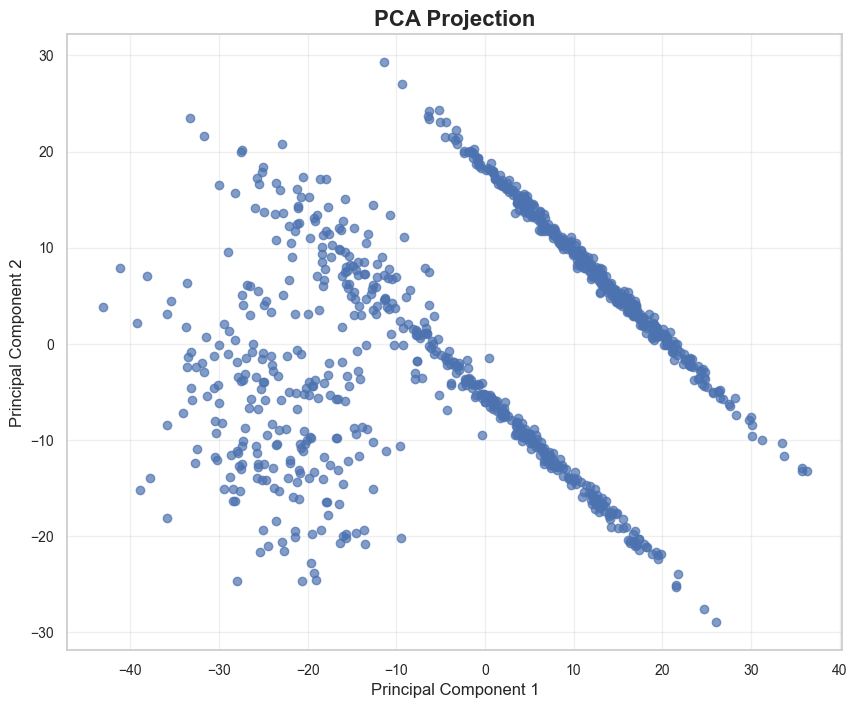


Performing Dimensionality Reduction...
Computing t-SNE projection...


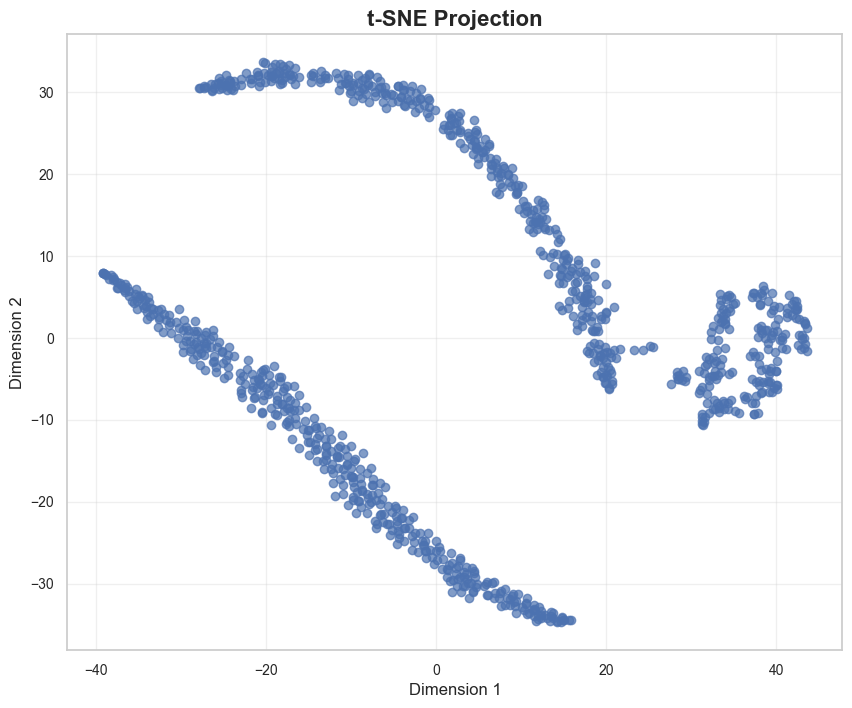

Computing UMAP projection...


C:\Users\hridi\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


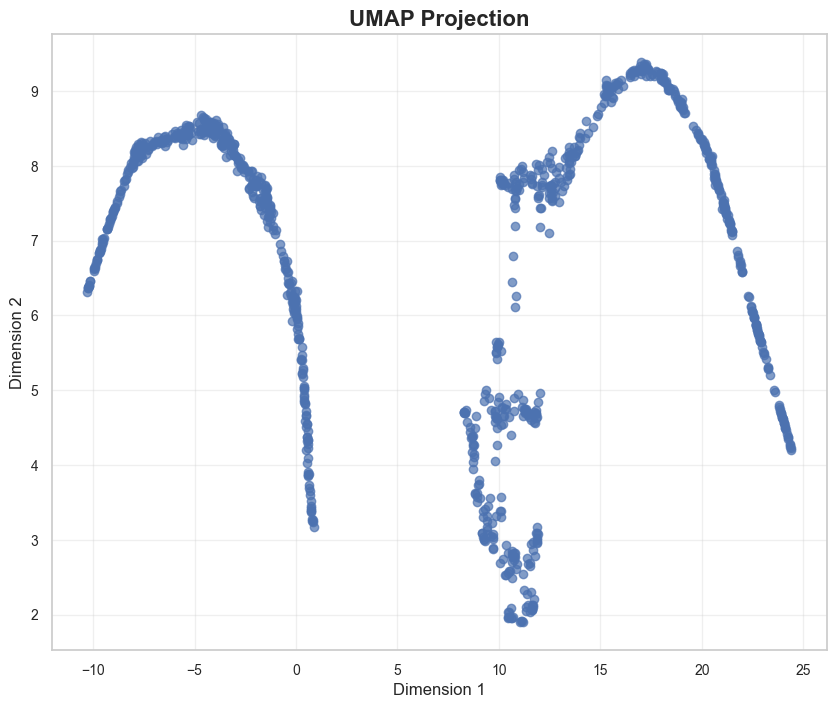


Loading EM dataset...

Running EM Algorithm...
Initialized Parameters - Mean (With FP): 1.2148145434719946, Mean (Without FP): 4.009211403351396, Proportion (With FP): 0.5
Iteration 1 - Mean (With FP): 2.8432, Mean (Without FP): 7.3374, Proportion (With FP): 0.0725
Iteration 2 - Mean (With FP): 3.1252, Mean (Without FP): 7.3183, Proportion (With FP): 0.0731
Iteration 3 - Mean (With FP): 3.2941, Mean (Without FP): 7.3199, Proportion (With FP): 0.0765
Iteration 4 - Mean (With FP): 3.4103, Mean (Without FP): 7.3294, Proportion (With FP): 0.0810
Iteration 5 - Mean (With FP): 3.4992, Mean (Without FP): 7.3429, Proportion (With FP): 0.0861
Iteration 6 - Mean (With FP): 3.5725, Mean (Without FP): 7.3585, Proportion (With FP): 0.0916
Iteration 7 - Mean (With FP): 3.6367, Mean (Without FP): 7.3753, Proportion (With FP): 0.0972
Iteration 8 - Mean (With FP): 3.6950, Mean (Without FP): 7.3929, Proportion (With FP): 0.1031
Iteration 9 - Mean (With FP): 3.7492, Mean (Without FP): 7.4110, Proportion

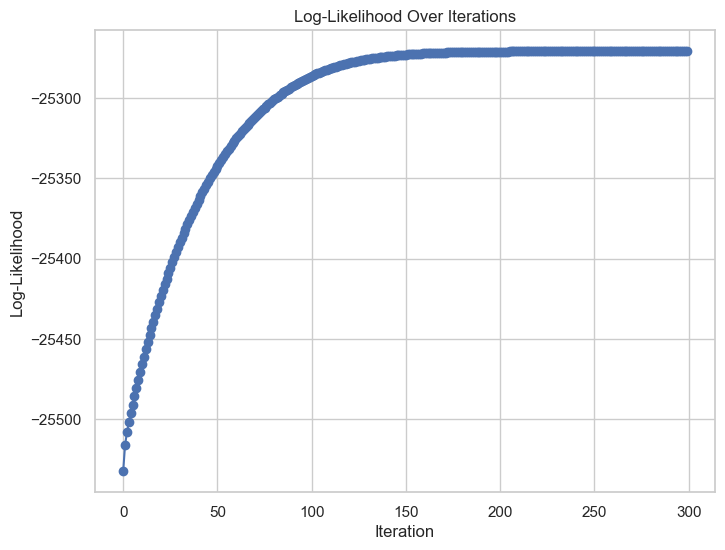

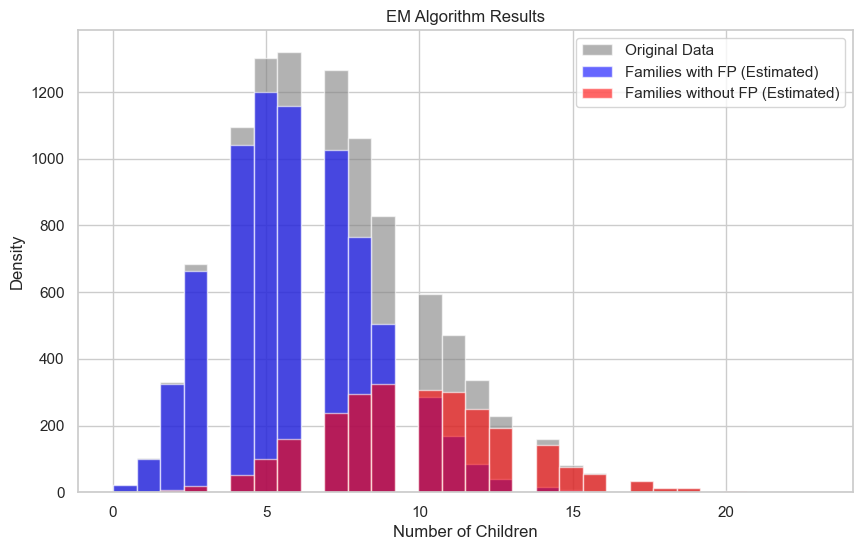

In [25]:
if __name__ == "__main__":
    # Load datasets
    print("Loading PCA dataset...")
    pca_data = DatasetLoader.load_pca_data("pca_data_online_4.txt")

    print("\nPerforming PCA...")
    # PCA
    pca = PCA(pca_data)
    pca.compute_pca()
    projected_data = pca.project_data(n_components=2)
    PCA.scatter_plot(projected_data)

    print("\nPerforming Dimensionality Reduction...")
    # UMAP and t-SNE
    DimensionalityReductionPlots.plot_tsne(pca_data)
    DimensionalityReductionPlots.plot_umap(pca_data)

    print("\nLoading EM dataset...")
    # Load EM dataset
    em_data = np.loadtxt("em_data_online_4.txt")  # Replace with actual file path

    print("\nRunning EM Algorithm...")
    # Run EM Algorithm
    em = EMAlgorithm(data=em_data, verbose=True)
    em.fit()

    print("\nPlotting EM Results...")
    # Plot EM results
    em.plot_log_likelihood()
    em.plot_results()
